#Loan Application Status Prediction
Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


# Import the Dependencies

In [95]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Importing Dataset

In [96]:
Loan_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Understanding Data

In [97]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


missing values in columns 

In [98]:
## column wise missing values
Loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
# data description
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [100]:
# checking for Duplicate values
Loan_data.duplicated().sum()

0

In [101]:
# unique values in Education column
columns=["Gender",'Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
for column in columns:
  print("\n",column)                                # column name
  print(Loan_data[column].value_counts())           # Value Count
  print(Loan_data[column].unique())                 # unique values


 Gender
Male      489
Female    112
Name: Gender, dtype: int64
['Male' 'Female' nan]

 Married
Yes    398
No     213
Name: Married, dtype: int64
['No' 'Yes' nan]

 Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
['0' '1' '2' '3+' nan]

 Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
['Graduate' 'Not Graduate']

 Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
['No' 'Yes' nan]

 Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

 Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
[ 1.  0. nan]

 Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
['Urban' 'Rural' 'Semiurban']

 Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
['Y' 

### Missing values Imputation

### categorical

In [102]:
# Impute missing values for Gender
Loan_data['Gender'].fillna(Loan_data['Gender'].mode()[0],inplace=True)

# Replace missing value of Self_Employed with more frequent category
Loan_data['Self_Employed'].fillna('No',inplace=True)

# Impute missing values for Married
Loan_data['Married'].fillna(Loan_data['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
Loan_data['Dependents'].fillna(Loan_data['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mode()[0],inplace=True)


### imputation of Continous variable

In [103]:
#Imputing Missing values with mean for continuous variable
Loan_data['LoanAmount'].fillna(Loan_data['LoanAmount'].mean(), inplace=True)
Loan_data['Loan_Amount_Term'].fillna(Loan_data['Loan_Amount_Term'].mean(), inplace=True)
Loan_data['ApplicantIncome'].fillna(Loan_data['ApplicantIncome'].mean(), inplace=True)
Loan_data['CoapplicantIncome'].fillna(Loan_data['CoapplicantIncome'].mean(), inplace=True)


# EDA 

### univariate analysis

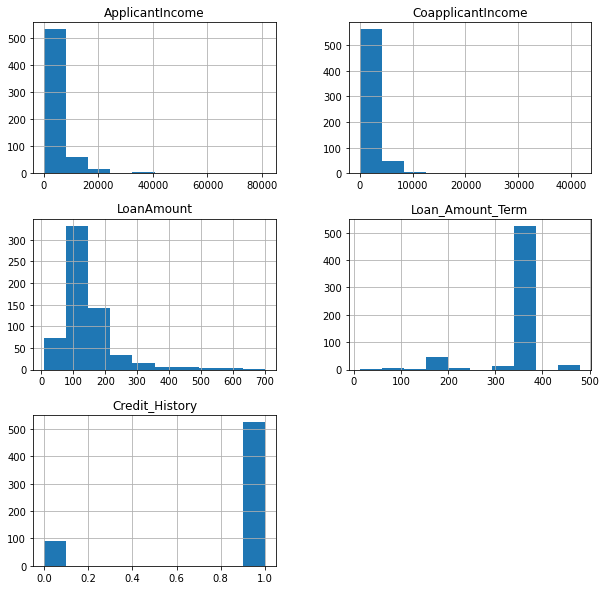

In [104]:
## plot histogram for numeric columns
Loan_data.hist(figsize=(10,10))
plt.show()

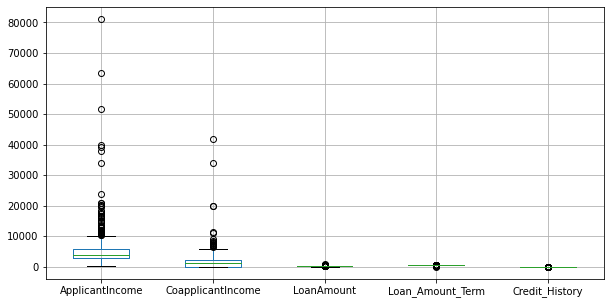

In [105]:
Loan_data.boxplot(figsize=(10,5))
plt.show()

# Bi variate analysis

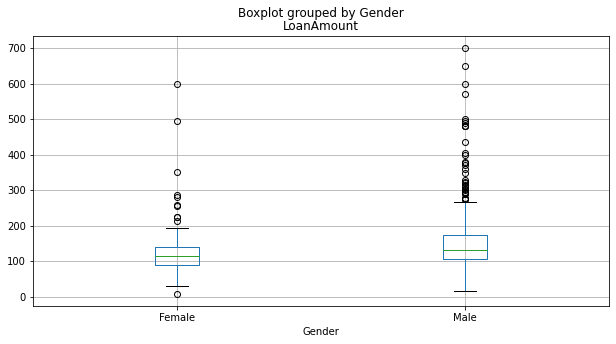

In [106]:
# Box Plot for variable LoanAmount by variable Gender
Loan_data.boxplot(column='LoanAmount', by = 'Gender',figsize=(10,5))

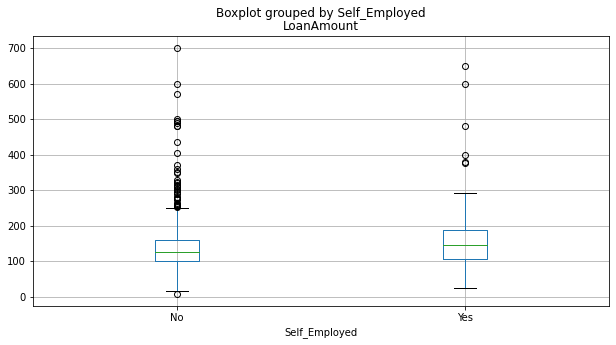

In [107]:
# Box Plot for variable LoanAmount by variable Gender
Loan_data.boxplot(column='LoanAmount', by = 'Self_Employed',figsize=(10,5))

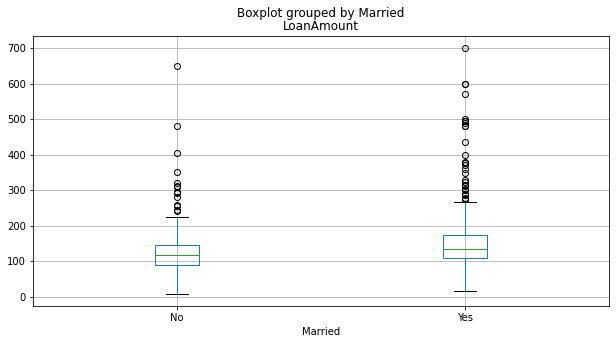

In [108]:
Loan_data.boxplot(column='LoanAmount', by = 'Married',figsize=(10,5))

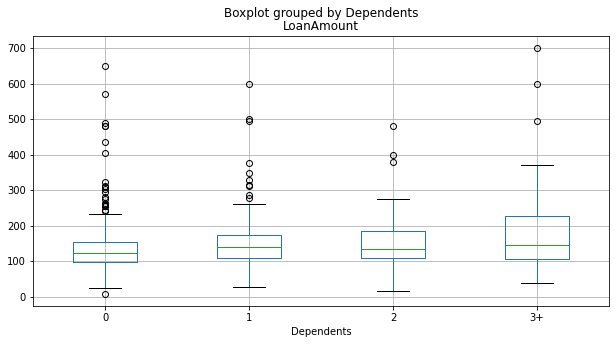

In [109]:
Loan_data.boxplot(column='LoanAmount', by = 'Dependents',figsize=(10,5))

### Multi variate ananlysis

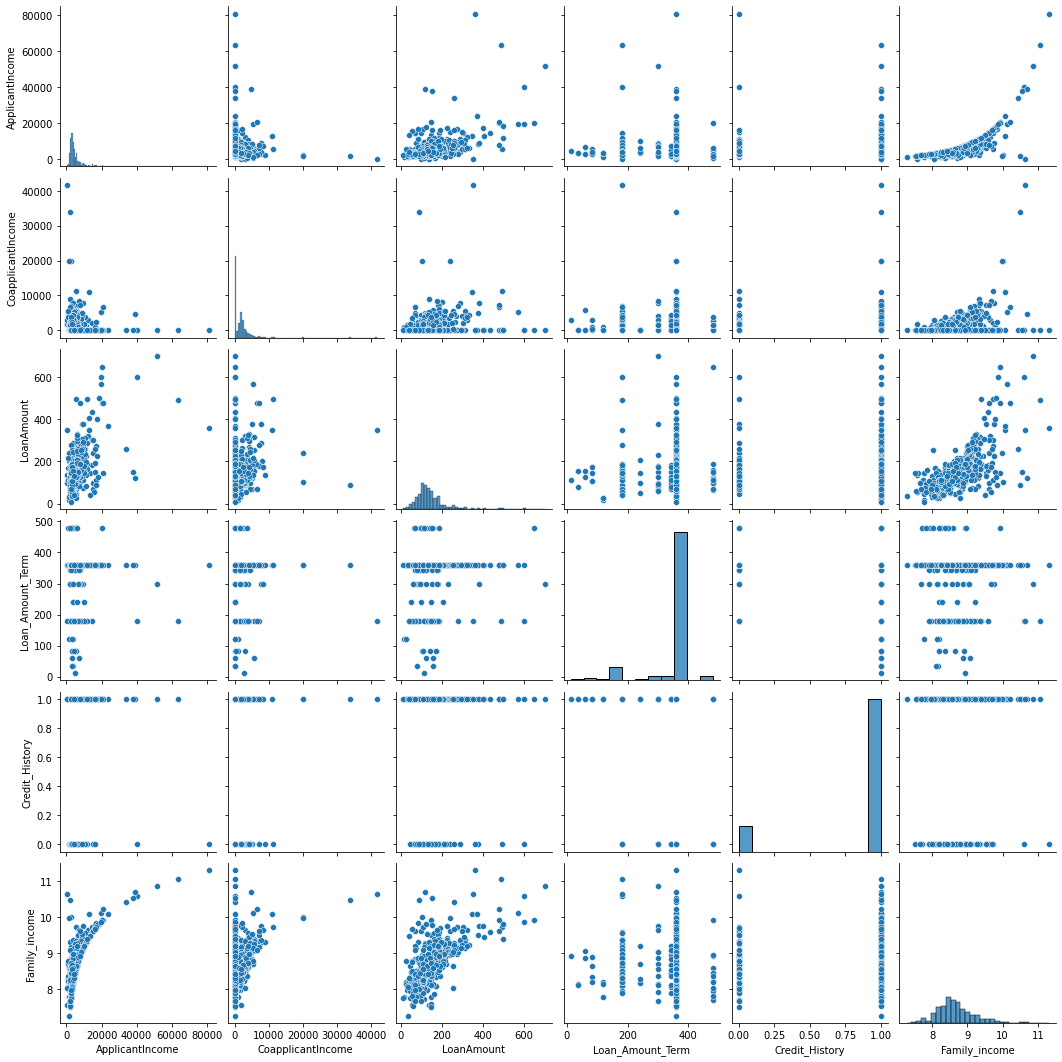

In [112]:
# Creating a pairplot of dataset
sns.pairplot(Loan_data)
plt.show()

## Feature Engineering

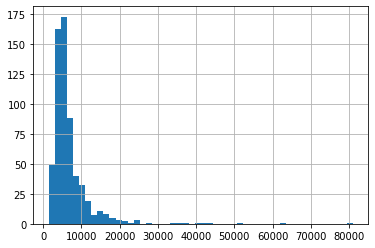

In [110]:
Loan_data['Family_income']=Loan_data['ApplicantIncome']+Loan_data['CoapplicantIncome']
Loan_data['Family_income'].hist(bins=50)

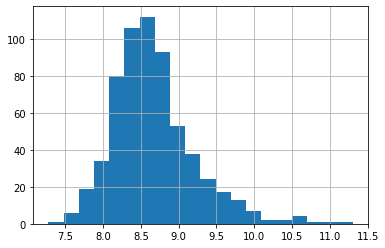

In [111]:
# to reduce the impact of Family Income
Loan_data['Family_income'] = np.log(Loan_data['Family_income'])

#Histogram for Total Income
Loan_data['Family_income'].hist(bins=20) 

In [113]:
# Hot Encoding
Loan_data['Loan_Status'] = Loan_data['Loan_Status'].map({"Y":int(1),'N':int(0)})

# Convert all non-numeric values to number
column=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in column:
    le =LabelEncoder()
    Loan_data[col]=le.fit_transform(Loan_data[col].astype('str'))
Loan_data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
Family_income        float64
dtype: object

In [114]:
#skewness in the data
Loan_data.drop('Loan_Status',axis=1).skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.159796
Education            1.367622
Family_income        1.076702
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.389680
dtype: float64

In [115]:
Loan_data.drop(['Loan_Status','CoapplicantIncome','ApplicantIncome'],axis=1).skew().sort_values(ascending=False)

LoanAmount          2.726601
Self_Employed       2.159796
Education           1.367622
Family_income       1.076702
Dependents          1.015551
Property_Area      -0.066196
Married            -0.644850
Gender             -1.648795
Credit_History     -2.021971
Loan_Amount_Term   -2.389680
dtype: float64

In [124]:
### Sepreating independent and dependent variable
features = Loan_data.drop(["Loan_Status",'Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)
target = Loan_data["Loan_Status"]

In [125]:
features

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Family_income
0,1,0,0,0,0,146.412162,360.0,1,2,8.674026
1,1,1,1,0,0,128.000000,360.0,1,0,8.714568
2,1,1,0,0,1,66.000000,360.0,1,2,8.006368
3,1,1,0,1,0,120.000000,360.0,1,2,8.505323
4,1,0,0,0,0,141.000000,360.0,1,2,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1,0,7.972466
610,1,1,3,0,0,40.000000,180.0,1,0,8.320205
611,1,1,1,0,0,253.000000,360.0,1,2,9.025456
612,1,1,2,0,0,187.000000,360.0,1,2,8.933664


### Features Selection

In [126]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
clf.fit(features, target)
feat_import = pd.DataFrame(zip(features.columns.tolist(), clf.feature_importances_ * 100), columns=['Feature', 'Importance'])
feat_import

,Feature,Importance
0,Gender,2.346066
1,Married,2.099581
2,Dependents,6.403784
3,Education,1.759535
4,Self_Employed,2.408787
5,LoanAmount,22.381903
6,Loan_Amount_Term,5.252512
7,Credit_History,28.240629
8,Property_Area,5.467769
9,Family_income,23.639432


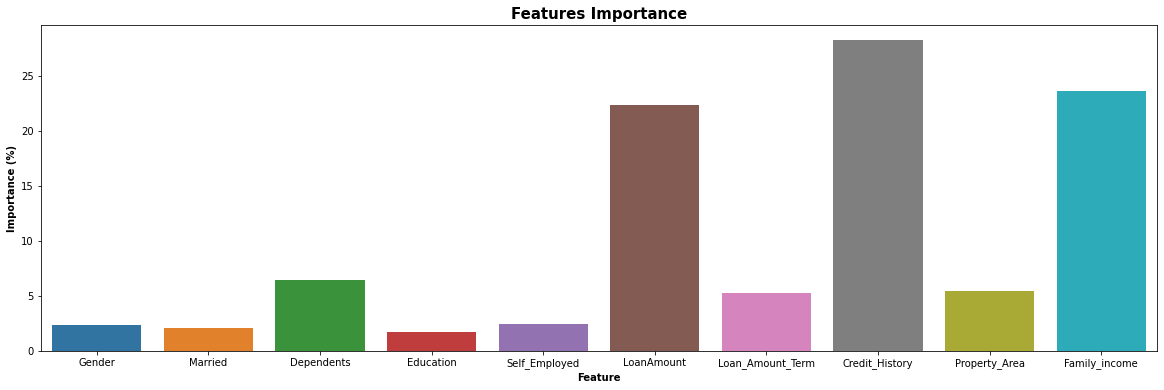

In [127]:
# Features importance plot
plt.figure(figsize=[20,6])
sns.barplot(data=feat_import, x='Feature', y='Importance')
plt.title('Features Importance', weight='bold', fontsize=15)
plt.xlabel('Feature', weight='bold', fontsize=10)
plt.ylabel('Importance (%)', weight='bold', fontsize=10);


## Will drop any Feature that has less than 5% of importance

In [128]:
### will drop the coumn as they have negligble impact on the prediction
features.drop(['Gender', 'Married', 'Education', 'Self_Employed'], axis=1, inplace=True)

## Feature Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
for col in features.columns:
    SC = StandardScaler()
    features[col] = SC.fit_transform(features[col].values.reshape(-1, 1))

In [130]:
# Checking for Imbalace in the data
round(target.value_counts(normalize=True) * 100, 2)

1    68.73
0    31.27
Name: Loan_Status, dtype: float64

In [131]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
ROS.fit(features, target)
features_resampled, target_resampled = ROS.fit_resample(features,target)
round(target_resampled.value_counts(normalize=True) * 100, 2)

1    50.0
0    50.0
Name: Loan_Status, dtype: float64

## Machine Learning

In [132]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Model building and Evaluation (Function)

In [133]:
def Model_Building(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=i)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=accuracy_score(y_train,check)
            
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

# Logistic Regression

In [134]:
Model_Building(features_resampled, target_resampled,LogisticRegression(solver="liblinear", random_state=1))

Test set accuracy 0.6923076923076923 Train set accuracy 0.7348148148148148 Random state 0 test_size 0.2
Test set accuracy 0.7041420118343196 Train set accuracy 0.7244444444444444 Random state 2 test_size 0.2
Test set accuracy 0.7159763313609467 Train set accuracy 0.7362962962962963 Random state 3 test_size 0.2
Test set accuracy 0.7455621301775148 Train set accuracy 0.717037037037037 Random state 5 test_size 0.2
Test set accuracy 0.7633136094674556 Train set accuracy 0.725925925925926 Random state 6 test_size 0.2
Test set accuracy 0.7988165680473372 Train set accuracy 0.7066666666666667 Random state 18 test_size 0.2


Accuracy of Logistic Regression: 79.88%
              precision    recall  f1-score   support

           0       0.91      0.59      0.72        73
           1       0.75      0.96      0.84        96

    accuracy                           0.80       169
   macro avg       0.83      0.77      0.78       169
weighted avg       0.82      0.80      0.79       169



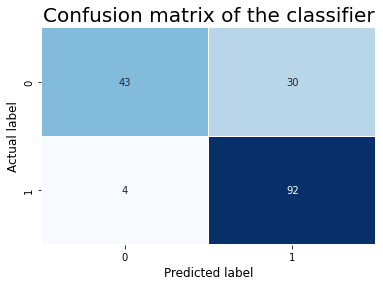

In [135]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=18)
LR =LogisticRegression(solver="liblinear", random_state=1)



LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)

# calculate accuracy score
LR_accuracy = accuracy_score(y_test, pred_LR)
print('Accuracy of Logistic Regression: {:.2f}%'.format(LR_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_LR)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
LR_pred_prob = LR.predict_proba(x_test)[:, 1]
LR_roc_auc = roc_auc_score(y_test, LR_pred_prob)



# Knn Classifier

In [136]:
Model_Building(features_resampled, target_resampled,KNeighborsClassifier())

Test set accuracy 0.7514792899408284 Train set accuracy 0.8414814814814815 Random state 0 test_size 0.2
Test set accuracy 0.7692307692307693 Train set accuracy 0.84 Random state 2 test_size 0.2
Test set accuracy 0.7869822485207101 Train set accuracy 0.8311111111111111 Random state 5 test_size 0.2
Test set accuracy 0.7928994082840237 Train set accuracy 0.8355555555555556 Random state 8 test_size 0.2
Test set accuracy 0.8106508875739645 Train set accuracy 0.8177777777777778 Random state 28 test_size 0.2
Test set accuracy 0.8165680473372781 Train set accuracy 0.8251851851851851 Random state 33 test_size 0.2
Test set accuracy 0.8224852071005917 Train set accuracy 0.8355555555555556 Random state 40 test_size 0.2


Accuracy of KNN CLASSIFIER: 82.25%
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        88
           1       0.81      0.83      0.82        81

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169



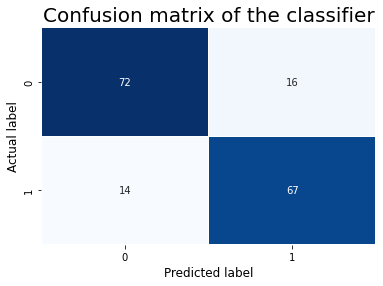

In [137]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=40)
KNN =KNeighborsClassifier()



KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

# calculate accuracy score
KNN_accuracy = accuracy_score(y_test, pred_KNN)
print('Accuracy of KNN CLASSIFIER: {:.2f}%'.format(KNN_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_KNN)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_KNN)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
KNN_pred_prob = KNN.predict_proba(x_test)[:, 1]
KNN_roc_auc = roc_auc_score(y_test, KNN_pred_prob)


## Naive Bayes Classifier

In [138]:
Model_Building(features_resampled, target_resampled,GaussianNB())

Test set accuracy 0.6923076923076923 Train set accuracy 0.7392592592592593 Random state 0 test_size 0.2
Test set accuracy 0.6982248520710059 Train set accuracy 0.7333333333333333 Random state 1 test_size 0.2
Test set accuracy 0.7159763313609467 Train set accuracy 0.7377777777777778 Random state 2 test_size 0.2
Test set accuracy 0.7337278106508875 Train set accuracy 0.7377777777777778 Random state 3 test_size 0.2
Test set accuracy 0.7396449704142012 Train set accuracy 0.7214814814814815 Random state 5 test_size 0.2
Test set accuracy 0.757396449704142 Train set accuracy 0.7229629629629629 Random state 7 test_size 0.2
Test set accuracy 0.7810650887573964 Train set accuracy 0.7111111111111111 Random state 18 test_size 0.2
Test set accuracy 0.7869822485207101 Train set accuracy 0.7111111111111111 Random state 33 test_size 0.2
Test set accuracy 0.7988165680473372 Train set accuracy 0.7155555555555555 Random state 63 test_size 0.2


Accuracy of GUSSIAN NAIVE BAYES: 79.88%
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        76
           1       0.74      0.98      0.84        93

    accuracy                           0.80       169
   macro avg       0.85      0.78      0.78       169
weighted avg       0.84      0.80      0.79       169



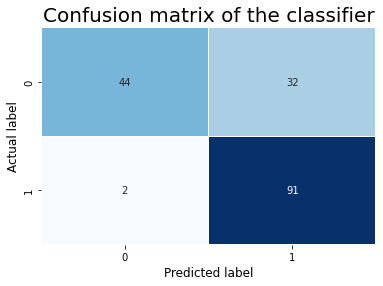

In [139]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=63)
GNB =GaussianNB()

GNB.fit(x_train, y_train)
pred_GNB = GNB.predict(x_test)

# calculate accuracy score
GNB_accuracy = accuracy_score(y_test, pred_GNB)
print('Accuracy of GUSSIAN NAIVE BAYES: {:.2f}%'.format(GNB_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_GNB)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_GNB)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
GNB_pred_prob = GNB.predict_proba(x_test)[:, 1]
GNB_roc_auc = roc_auc_score(y_test, GNB_pred_prob)


## Random Forest Classifier

In [140]:
Model_Building(features_resampled, target_resampled,RandomForestClassifier(random_state=42))

Test set accuracy 0.8579881656804734 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.8816568047337278 Train set accuracy 1.0 Random state 1 test_size 0.2
Test set accuracy 0.8994082840236687 Train set accuracy 1.0 Random state 7 test_size 0.2
Test set accuracy 0.9289940828402367 Train set accuracy 1.0 Random state 9 test_size 0.2


Accuracy of RANDOM FOREST: 92.90%
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        79
           1       0.95      0.91      0.93        90

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



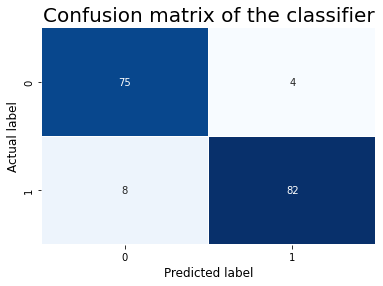

In [141]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=9)
RF =RandomForestClassifier(random_state=42)

RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

# calculate accuracy score
RF_accuracy = accuracy_score(y_test, pred_RF)
print('Accuracy of RANDOM FOREST: {:.2f}%'.format(RF_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_RF)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
RF_pred_prob = RF.predict_proba(x_test)[:, 1]
RF_roc_auc = roc_auc_score(y_test, RF_pred_prob)

## Decision Tree classifier

In [142]:
Model_Building(features_resampled, target_resampled,DecisionTreeClassifier(random_state=42))

Test set accuracy 0.8165680473372781 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.8579881656804734 Train set accuracy 1.0 Random state 1 test_size 0.2
Test set accuracy 0.863905325443787 Train set accuracy 1.0 Random state 7 test_size 0.2
Test set accuracy 0.9053254437869822 Train set accuracy 1.0 Random state 28 test_size 0.2


Accuracy of DECISION TREE: 90.53%
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        86
           1       0.95      0.86      0.90        83

    accuracy                           0.91       169
   macro avg       0.91      0.90      0.90       169
weighted avg       0.91      0.91      0.91       169



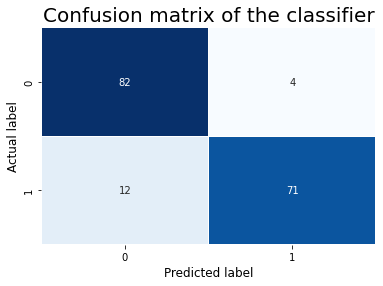

In [143]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=28)
DT =DecisionTreeClassifier(random_state=42)

DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)

# calculate accuracy score
DT_accuracy = accuracy_score(y_test, pred_DT)
print('Accuracy of DECISION TREE: {:.2f}%'.format(DT_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_DT)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_DT)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
DT_pred_prob = DT.predict_proba(x_test)[:, 1]
DT_roc_auc = roc_auc_score(y_test, DT_pred_prob)

## ADA Boost Classifier

In [144]:
Model_Building(features_resampled, target_resampled,AdaBoostClassifier())

Test set accuracy 0.7455621301775148 Train set accuracy 0.8207407407407408 Random state 0 test_size 0.2
Test set accuracy 0.7751479289940828 Train set accuracy 0.8103703703703704 Random state 1 test_size 0.2
Test set accuracy 0.8047337278106509 Train set accuracy 0.8325925925925926 Random state 4 test_size 0.2
Test set accuracy 0.834319526627219 Train set accuracy 0.8059259259259259 Random state 18 test_size 0.2
Test set accuracy 0.8483412322274881 Train set accuracy 0.8120063191153238 Random state 46 test_size 0.25


Accuracy of ADA BOOST CLASSIFIER: 81.66%
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        95
           1       0.73      0.92      0.81        74

    accuracy                           0.82       169
   macro avg       0.83      0.83      0.82       169
weighted avg       0.84      0.82      0.82       169



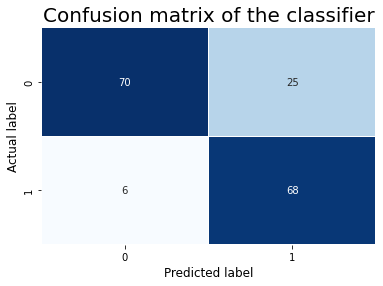

In [145]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=46)
ADA =AdaBoostClassifier()

ADA.fit(x_train, y_train)
pred_ADA = ADA.predict(x_test)

# calculate accuracy score
ADA_accuracy = accuracy_score(y_test, pred_ADA)
print('Accuracy of ADA BOOST CLASSIFIER: {:.2f}%'.format(ADA_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_ADA)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_ADA)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
ADA_pred_prob = ADA.predict_proba(x_test)[:, 1]
ADA_roc_auc = roc_auc_score(y_test, ADA_pred_prob)

## SUPPORT VECTOR CLASSIFIER

In [146]:
Model_Building(features_resampled, target_resampled,SVC())

Test set accuracy 0.727810650887574 Train set accuracy 0.7807407407407407 Random state 0 test_size 0.2
Test set accuracy 0.7455621301775148 Train set accuracy 0.7881481481481482 Random state 1 test_size 0.2
Test set accuracy 0.7514792899408284 Train set accuracy 0.7807407407407407 Random state 2 test_size 0.2
Test set accuracy 0.7751479289940828 Train set accuracy 0.7866666666666666 Random state 5 test_size 0.2
Test set accuracy 0.7810650887573964 Train set accuracy 0.794074074074074 Random state 6 test_size 0.2
Test set accuracy 0.7869822485207101 Train set accuracy 0.7703703703703704 Random state 7 test_size 0.2
Test set accuracy 0.8106508875739645 Train set accuracy 0.7777777777777778 Random state 18 test_size 0.2
Test set accuracy 0.834319526627219 Train set accuracy 0.7644444444444445 Random state 62 test_size 0.2


Accuracy of SUPPORT VECTOR MACHINE: 83.43%
              precision    recall  f1-score   support

           0       0.96      0.68      0.79        80
           1       0.77      0.98      0.86        89

    accuracy                           0.83       169
   macro avg       0.87      0.83      0.83       169
weighted avg       0.86      0.83      0.83       169



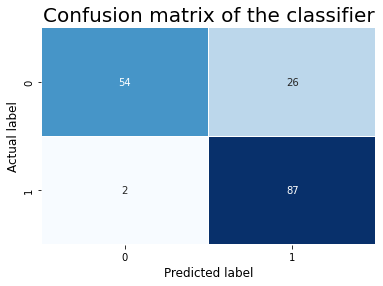

In [147]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=62)
SVM =SVC()

SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)

# calculate accuracy score
SVM_accuracy = accuracy_score(y_test, pred_SVM)
print('Accuracy of SUPPORT VECTOR MACHINE: {:.2f}%'.format(SVM_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_SVM)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_SVM)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

## SVM DEOSNOT SUPPORT AUC CURVE

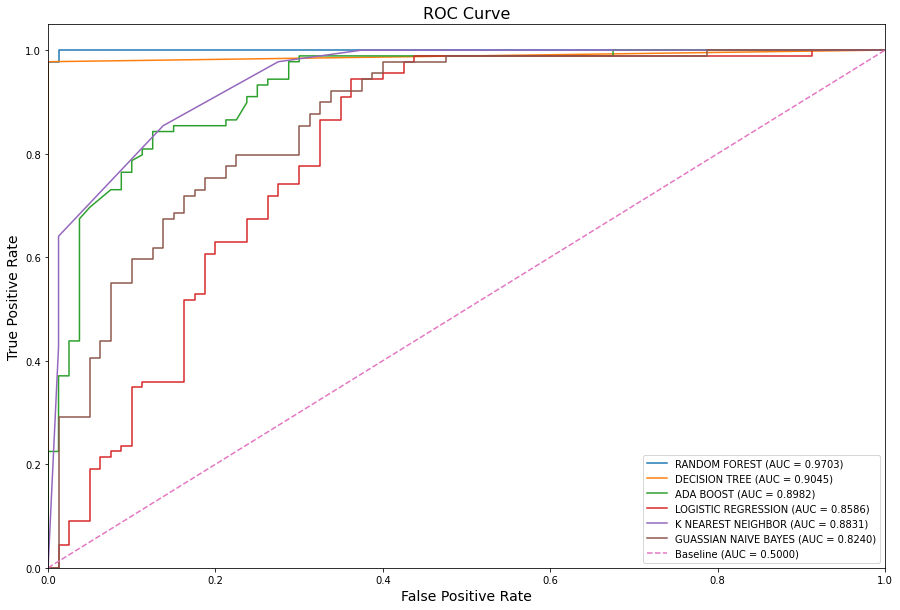

In [148]:
# create ROC curves

from sklearn.metrics import roc_curve
## RANDOM FOREST
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])

## DECISION TREE
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT.predict_proba(x_test)[:,1])

## ADA BOOST
ADA_fpr, ADA_tpr, ADA_thresholds = roc_curve(y_test, ADA.predict_proba(x_test)[:,1])

## LOGISTIC REGRESSION
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

## K NEAREST NEIGHBOUR
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])

## GUASSIAN NAIVE BAYES 
GNB_fpr, GNB_tpr, GNB_thresholds = roc_curve(y_test, GNB.predict_proba(x_test)[:,1])

plt.figure(figsize=(15, 10))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="RANDOM FOREST (AUC = {:1.4f})".format(RF_roc_auc))
plt.plot(DT_fpr, DT_tpr, label="DECISION TREE (AUC = {:1.4f})".format(DT_roc_auc))
plt.plot(ADA_fpr, ADA_tpr, label="ADA BOOST (AUC = {:1.4f})".format(ADA_roc_auc))
plt.plot(LR_fpr, LR_tpr, label="LOGISTIC REGRESSION (AUC = {:1.4f})".format(LR_roc_auc))
plt.plot(KNN_fpr, KNN_tpr, label="K NEAREST NEIGHBOR (AUC = {:1.4f})".format(KNN_roc_auc))
plt.plot(GNB_fpr, GNB_tpr, label="GUASSIAN NAIVE BAYES (AUC = {:1.4f})".format(GNB_roc_auc))

# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

## AS RANDOM FOREST has the maximum auc_score we will perform hyper parametric tunning to get better result on it 

# Hyper Parametric Tuning

## Random Forest

In [156]:
%%time

x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=9)
rf = RandomForestClassifier(random_state=5)

estimators = [int(x) for x in np.linspace(start=50, stop=150, num=10)]
depth = [int(x) for x in np.linspace(start=50, stop=150, num=10)]
param_grid = {    'n_estimators': estimators,
                  'max_depth': depth
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv=5)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

best estimator: RandomForestClassifier(max_depth=50, n_estimators=138, random_state=5)
best params: {'max_depth': 50, 'n_estimators': 138}
best score: 0.834074074074074
CPU times: user 1min 46s, sys: 685 ms, total: 1min 46s
Wall time: 1min 48s


In [157]:
# make predictions

pred_rf = grid_rf.predict(x_test)

# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_rf)
print(report)

Accuracy of Random Forest Classifier: 92.90%
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        79
           1       0.95      0.91      0.93        90

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



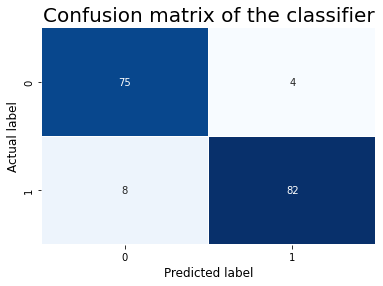

In [158]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

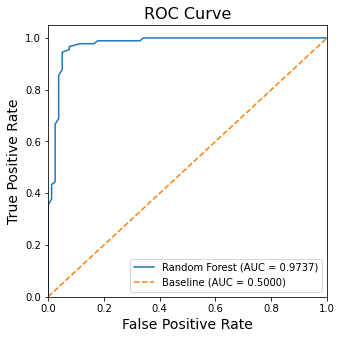

In [159]:
y_pred_prob = grid_rf.predict_proba(x_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)
# create ROC curves

from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(5, 5))

# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Creating a pickle file 

In [160]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("loan_Case_Study.pkl","wb") # name of my pickle file , wb -write
pickle.dump(grid_rf, pickle_out)
pickle_out.close()

In [161]:
# loading the pickeled model
pickle_in = open("loan_Case_Study.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

In [162]:
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
Predicted,0,0,0,1,1,1,0,1,0,0,...,0,1,1,0,0,0,1,1,0,1
Original,0,0,0,1,1,1,0,1,0,0,...,0,1,1,0,0,0,1,1,0,1


# LOAN APPLICATION STATUS CASE STUDY COMPLETED